In [45]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score

from sklearn.tree import  DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

В результате выполнения заданий вы сможете:

выбирать оптимальные значения параметров n_estimators и max_depth для случайного леса;
реализовать свой случайные лес;
решать задачи классификации и регрессии с помощью случайного леса.
Для выполнения задания вы можете самостоятельно создать Python-ноутбук, а в LMS прикладывать лишь требуемые результаты.

Будем работать с датасетом музыкальных композиций с предыдущего практического задания, где уже обработаны категориальные переменные.

In [46]:
df = pd.read_csv("data.csv")
df.head()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,77,230613,False,0.509,0.448,4,-7.552,0,0.0357,0.00713,0.013700,0.2440,0.221,156.909,3,0.0
1,79,208760,False,0.636,0.676,2,-3.442,1,0.0263,0.08070,0.000000,0.0831,0.273,113.980,4,0.0
2,76,180690,False,0.573,0.539,2,-6.091,0,0.0322,0.01620,0.000012,0.1050,0.390,75.012,4,0.0
3,84,232106,False,0.743,0.446,4,-7.807,0,0.0683,0.00390,0.118000,0.3370,0.278,123.596,4,0.0
4,76,225026,False,0.572,0.214,7,-15.625,1,0.0293,0.64900,0.129000,0.1250,0.485,95.542,4,0.0


---

### 1 задание
Целевой признак popularity.

Считайте данные через pandas

Сделайте разбиение на обучение и тест с соотношением 80/20 и random_state=1.

Обучите дерево решений для задачи на базовых параметрах с фиксированным random_state=1 и посчитайте метрику RMSE на тренировочной и тестовой выборках.

Обучите случайный лес для задачи на базовых параметрах с фиксированным random_state=1 и посчитайте метрику RMSE на тренировочной и тестовой выборках.

Укажите, на сколько метрика на тесте на случайном лесу лучше, чем на дереве решений, округлив до второго знака после точки.

In [47]:
X = df.drop(columns=["popularity"])
y = df["popularity"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1)

In [48]:
tree = DecisionTreeRegressor(random_state=1)
tree.fit(X_train, y_train) 

tree_pred_test = tree.predict(X_test)
tree_pred_train = tree.predict(X_train)

tree_rmse_test = np.sqrt(mean_squared_error(y_test, tree_pred_test))
tree_rmse_train = np.sqrt(mean_squared_error(y_train, tree_pred_train))

print(f"RMSE tree test {tree_rmse_test}")
print(f"RMSE tree train {tree_rmse_train}")

RMSE tree test 29.700319451538643
RMSE tree train 4.501354464624463


In [49]:
forest = RandomForestRegressor(random_state=1)
forest.fit(X_train, y_train) 

forest_pred_test = forest.predict(X_test)
forest_pred_train = forest.predict(X_train)

forest_rmse_test = np.sqrt(mean_squared_error(y_test, forest_pred_test))
forest_rmse_train = np.sqrt(mean_squared_error(y_train, forest_pred_train))

print(f"RMSE forest test {forest_rmse_test}")
print(f"RMSE forest train {forest_rmse_train}")

RMSE forest test 22.691988372811892
RMSE forest train 9.167082947577512


In [50]:
q1_answer = forest_rmse_test - tree_rmse_test
q1_answer = np.round(q1_answer, 2)
print(
    f"Метрика на тесте на случайном лесу лучше, чем на дереве решений на {-q1_answer}")

Метрика на тесте на случайном лесу лучше, чем на дереве решений на 7.01


---
### 2 задание

Продолжайте работать с датасетом музыкальных композиций.

У модели случайный лес оставьте параметр random_state=1. Измените глубину деревьев от 1 до 50 с шагом 3.

Визуализируйте изменение ошибки RMSE на тренировочной и тестовой выборках от параметра глубины.

Выберите правильный вывод:

Выберите один ответ:

> Увеличение до разумных пределов параметра max_depth в случайном лесу ухудшает качество модели

> Увеличение до разумных пределов параметра max_depth в случайном лесу улучшает качество модели

> Параметр max_depth не влияет на качество случайного леса

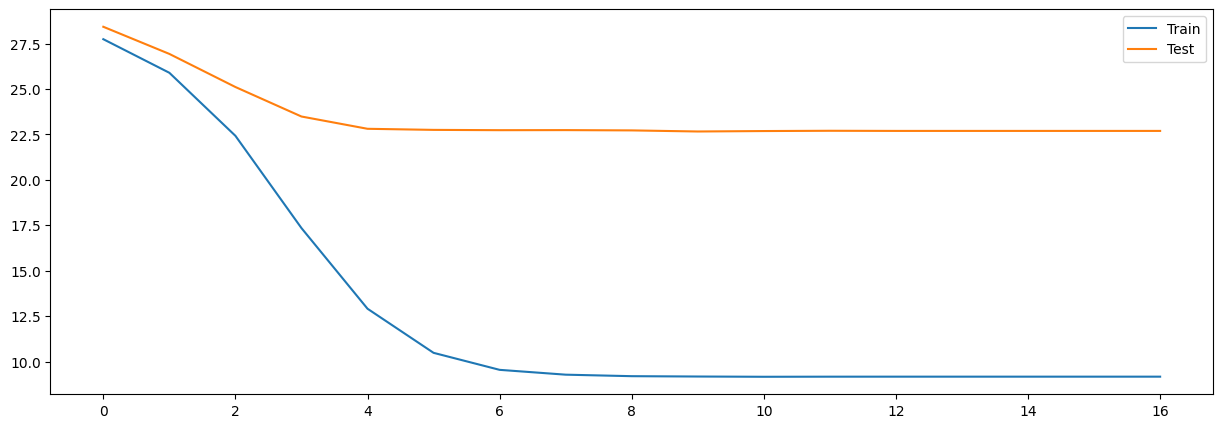

In [51]:
rmse_loss_train = []
rmse_loss_test = []
for i in range(1, 51, 3):
    forest = RandomForestRegressor(random_state=1, max_depth=i)
    forest.fit(X_train, y_train)

    forest_pred_test = forest.predict(X_test)
    forest_pred_train = forest.predict(X_train)

    forest_rmse_test = np.sqrt(mean_squared_error(y_test, forest_pred_test))
    forest_rmse_train = np.sqrt(mean_squared_error(y_train, forest_pred_train))

    rmse_loss_train.append(forest_rmse_train)
    rmse_loss_test.append(forest_rmse_test)

fig, axes = plt.subplots(1, 1, figsize=(15, 5))

line_1 = sns.lineplot(rmse_loss_train, ax=axes, label="Train")
line_2 = sns.lineplot(rmse_loss_test, ax=axes, label="Test")
axes.legend()
plt.show()

> Увеличение до разумных пределов параметра max_depth в случайном лесу улучшает качество модели
___
### 3 задание

Продолжайте работать с датасетом музыкальных композиций.

Давайте снова перейдем к задаче бинарной классификации (популярная песня/не популярная песня), для этого нужно перевести целевой признак popularity в бинарный вид:

Если признак popularity больше 50 - 1 класс

Если признак popularity меньше или равен 50 - 0 класс

Работайте с выборками после разбиения на обучение и тест

Обучите дерево решений для задачи бинарной классификации с фиксированным random_state=1 и со значением глубины дерева 17.

Посчитайте метрику accuracy на тренировочной и тестовой выборках.

Обучите случайный лес для задачи на базовых параметрах с фиксированным `random_state=1`.

Посчитайте метрику accuracy на тренировочной и тестовой выборках.

Укажите, на сколько метрика на тесте на случайном лесу лучше, чем на дереве решений, округлив до второго знака после точки.

In [52]:
df_classif = df.copy()

In [53]:
df_classif['popularity'] = df_classif['popularity'].apply(
    lambda x: 1 if x > 50 else 0)

print(df_classif['popularity'].unique())

[1 0]


In [54]:
X = df_classif.drop(columns=["popularity"])
y = df_classif["popularity"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1)

In [55]:
tree = DecisionTreeClassifier(random_state=1, max_depth=17)
tree.fit(X_train, y_train) 

tree_pred_test = tree.predict(X_test)
tree_pred_train = tree.predict(X_train)

tree_acc_test = accuracy_score(y_test, tree_pred_test)
tree_acc_train = accuracy_score(y_train, tree_pred_train)

print(f"Accuracy tree test {tree_acc_test}")
print(f"Accuracy tree train {tree_acc_train}")

Accuracy tree test 0.698
Accuracy tree train 0.9805


In [56]:
forest = RandomForestClassifier(random_state=1)
forest.fit(X_train, y_train) 

forest_pred_test = forest.predict(X_test)
forest_pred_train = forest.predict(X_train)

forest_acc_test = accuracy_score(y_test, forest_pred_test)
forest_acc_train = accuracy_score(y_train, forest_pred_train)

print(f"Accuracy forest test {forest_acc_test}")
print(f"Accuracy forest train {forest_acc_train}")

Accuracy forest test 0.777
Accuracy forest train 0.9935


In [57]:
q2_answer = forest_acc_test - tree_acc_test
q2_answer = np.round(q2_answer, 2)
print(
    f"Метрика на тесте на случайном лесу лучше, чем на дереве решений на {q2_answer}")

Метрика на тесте на случайном лесу лучше, чем на дереве решений на 0.08


---
### 4 задание

Продолжайте работать с датасетом музыкальных композиций.

У модели случайный лес оставьте параметр random_state=1. Измените количество деревьев от 1 до 150 с шагом 10.

Визуализируйте изменение метрики accuracy на тренировочной и тестовой выборках от параметра количества моделей.

Выберите правильный вывод:
Выберите один ответ:

> Параметр n_estimators не влияет на качество случайного леса

> Увеличение до разумных пределов параметра n_estimators в случайном лесу ухудшает качество модели

> Увеличение до разумных пределов параметра n_estimators в случайном лесу улучшает качество модели

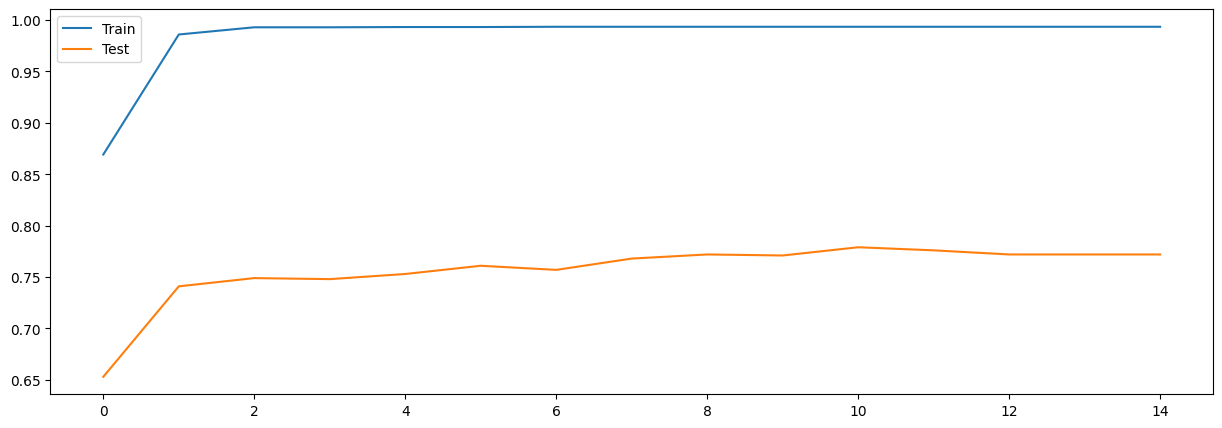

In [58]:
acc_loss_train = []
acc_loss_test = []
for i in range(1, 151, 10):
    forest = RandomForestClassifier(random_state=1, n_estimators=i)
    forest.fit(X_train, y_train)

    forest_pred_test = forest.predict(X_test)
    forest_pred_train = forest.predict(X_train)

    forest_acc_test = accuracy_score(y_test, forest_pred_test)
    forest_acc_train = accuracy_score(y_train, forest_pred_train)

    acc_loss_train.append(forest_acc_train)
    acc_loss_test.append(forest_acc_test)

fig, axes = plt.subplots(1, 1, figsize=(15, 5))

line_1 = sns.lineplot(acc_loss_train, ax=axes, label="Train")
line_2 = sns.lineplot(acc_loss_test, ax=axes, label="Test")
axes.legend()
plt.show()

> Увеличение до разумных пределов параметра n_estimators в случайном лесу улучшает качество модели
---
### 5 задание

Продолжайте работать с датасетом музыкальных композиций.

В этом задании начнём делать свой случайный лес. Для начала нужно сделать функцию для получения подвыборок для деревьев. На вход функции подаём параметры:

data - признаки выборки

labels - целевые значения выборки

n - кол-во подвыборок

max_samples - доля объектов для подвыборок

Можете воспользоваться заготовкой.

Передайте тренировочную выборку для задачи бинарной классификации в функцию get_bootstrap с параметрами n=3, max_samples=0.01.

И укажите, сколько объектов первого класса оказалось в первой (по индексу нулевой) подвыборке при самом первом запуске функции после её объявления.

In [59]:
np.random.seed(42)  # для фиксации случайности


def get_bootstrap(data, labels, n=100, max_samples=1.0):
    if isinstance(data, pd.DataFrame):
        data = data.copy().values  # перевод таблицы в numpy array

    if isinstance(labels, pd.DataFrame) or isinstance(labels, pd.Series):
        labels = labels.copy().values  # перевод целевого признака в numpy array

    n_samples = data.shape[0]  # подсчет кол-ва объектов в подвыборках
    bootstrap = []  # список для будущих подвыборок

    for i in range(n):

        sample_index = np.random.choice(n_samples, size=int(
            n_samples * max_samples), replace=True)  # взятие случайных индексов в кол-ве n_samples
        b_data = data[sample_index]  # взятие объектов по выбранным индексам
        # взятие целевых значений по выбранным индексам
        b_labels = labels[sample_index]

        bootstrap.append((b_data, b_labels))  # добавление в список подвыборок

    return bootstrap


# Пример работы функции на данных из двух признаков на первом запуске:
sample_X = np.array([
    [0, 0],
    [1, 1],
    [2, 2]
])

sample_y = np.array([0, 1, 2])

test_booty_1 = get_bootstrap(sample_X, sample_y, n=3, max_samples=1.0)

test_booty_2 = [
    (np.array([[2, 2], [0, 0], [2, 2]]), np.array([2, 0, 2])),
    (np.array([[2, 2], [0, 0], [0, 0]]), np.array([2, 0, 0])),
    (np.array([[2, 2], [1, 1], [2, 2]]), np.array([2, 1, 2]))
]

# Проверка равенства каждого элемента в кортежах
for (data1, labels1), (data2, labels2) in zip(test_booty_1, test_booty_2):
    assert np.array_equal(data1, data2), f"Данные не совпадают: {data1} != {data2}"
    assert np.array_equal(labels1, labels2), f"Метки не совпадают: {labels1} != {labels2}"

print("Функция работает!")

Функция работает!


In [60]:
### Альтернатива

np.random.seed(42)
def get_bootstrap(data, labels, n, max_samples):
    """Функция для получения подвыборок"""
    bootstraps = []
    num_samples = int(len(data) * max_samples)

    for _ in range(n):
        bootstrap_indices = np.random.choice(len(data), size=num_samples, replace=True)
        bootstraps.append((data.iloc[bootstrap_indices], labels.iloc[bootstrap_indices]))
    
    return bootstraps


# Вызываем функцию get_bootstrap
bootstraps = get_bootstrap(data=X_train, labels=y_train, n=3, max_samples=0.01)

# Количество объектов первого класса в первой подвыборке
first_class_count = (bootstraps[0][1] == 1).sum()  # Предполагаем, что 1 - это первый класс
print("Количество объектов первого класса в первой подвыборке:", first_class_count)

Количество объектов первого класса в первой подвыборке: 12


In [61]:
np.random.seed(42)
# Выполнение функции get_bootstrap
test_strap = get_bootstrap(data=X_train, labels=y_train, n=3, max_samples=0.01)

# Определяем количество объектов первого класса в первой (нулевой) подвыборке
first_sample_labels = test_strap[0][1]  # Получаем метки из первой подвыборки
num_class_0 = np.sum(first_sample_labels == 1)  # Считаем количество меток 1 класса

print("Количество объектов первого класса в первой подвыборке:", num_class_0)

Количество объектов первого класса в первой подвыборке: 12


---
### 6 задание

Продолжайте работать с датасетом музыкальных композиций.

Теперь сделаем функцию для получения подмножества признаков.

На вход функции подаём параметры:

features - признаки выборки

max_features - доля признаков для подвыборок

Можете воспользоваться заготовкой.

Передайте признаки из тренировочной выборки для задачи бинарной классификации в функцию get_subsample с параметром max_features=0.1.

И укажите, какой признак вернулся после выполнения функции при самом первом запуске после её объявления.

In [62]:
np.random.seed(42)  # для фиксации случайности


def get_subsample(features, max_features=1.0):
    if not isinstance(features, np.ndarray):
        features = np.array(features.copy())  # перевод признаков в numpy array

    len_features = len(features)  # подсчет кол-ва признаков в подвыборках
    sample_indexes = list(range(len(features)))  # получение списка индексов признаков

    subsample = np.random.choice(  # взятие случайных индексов признаков
        sample_indexes,
        size=int(len_features*max_features),  # в кол-ве len_features
        replace=False  # без повторений
    )

    return features[subsample]  # на список выходе признаки


# Пример работы функции на данных из трех признаков на первом запуске:

sample_features = ['f1', 'f2', 'f3']
print(get_subsample(sample_features, max_features=0.5))
print(get_subsample(sample_features, max_features=0.8))


['f1']
['f2' 'f3']


In [63]:
np.random.seed(42)  # для фиксации случайности

print(get_subsample(X_train.columns, max_features=0.1))

['instrumentalness']


---
### 7 задание

Продолжайте работать с датасетом музыкальных композиций.

Пришло время строить случайный лес из 100 деревьев, для этого:

1. Сделайте нужное количество подвыборок с половиной объектов

2. Сделайте выбор половины признаков*

3. Постройте 100 деревьев на подвыборках

Можете воспользоваться заготовкой.

*При построении случайного леса из sklearn выбираются случайные признаки на каждом выборе лучшего разбиения в дереве решений, но в этом задании будем выбирать случайные признаки для каждого дерева решений.

Укажите, какая глубина получилась у первого (по индексу нулевого) дерева решений.

In [64]:
np.random.seed(42)  # для фиксации случайности

forest = []
bootstrap = get_bootstrap(data=X_train, labels=y_train, n=100,
                          max_samples=0.5)  # получаем подвыборки

for b_data, b_labels in bootstrap:
    b_data = pd.DataFrame(b_data, columns=X_train.columns)
    features = get_subsample(
        features=X_train.columns, max_features=0.5)  # получаем признаки

    dt = DecisionTreeClassifier(random_state=1).fit(b_data[features], b_labels)
    forest.append(dt)

q7_answer = forest[0].get_depth()

print(f'Глубина первого (по индексу нулевого) дерева решений = {q7_answer}')

Глубина первого (по индексу нулевого) дерева решений = 23


Ответ: 23

Ваш ответ неверен. Обратите внимание на следующее:

• фиксированная случайность np.random.seed (42)

• выбраны корректные параметры функции get_bootstrap

• выбраны корректные параметры функции get_subsample

• получение глубины у корректного дерева из случайного леса

---
### 8 задание

Продолжайте работать с датасетом музыкальных композиций.

Получите предсказания для тестовых объектов обученным случайным лесом из предыдущего задания.

Можно взять имена признаков из tree.feature_names_in_

Можете воспользоваться заготовкой.

Укажите, какая метрика качества accuracy получилась, округлив её до второго знака после точки.

In [65]:
np.random.seed(42)  # для фиксации случайности
# добавим предсказания всех деревьев в список
predictions = []
for tree in forest:
    feats = tree.feature_names_in_
    predictions.append(tree.predict(X_test[feats]))

# сформируем список с предсказаниями для каждого объекта
predictions_per_object = list(zip(*predictions))


# выберем в качестве итогового предсказания для каждого объекта тот класс,
# за который проголосовало большинство деревьев
voted_predictions = []
for obj in predictions_per_object:
    voted_predictions.append(np.bincount(obj).argmax())

# Теперь вычисляем accuracy
accuracy = accuracy_score(y_test, voted_predictions)

# Округляем до второго знака после запятой
rounded_accuracy = round(accuracy, 2)
print("Метрика качества accuracy:", rounded_accuracy)

Метрика качества accuracy: 0.76


Ответ: 0.76

Ваш ответ неверен. Обратите внимание на следующее:

• предсказания делаются на верном подмножестве признаков для каждого
дерева решений

• предсказания делаются для всех тестовых объектов

• финальный класс для объекта получается путем голосования деревьев

• округление метрики до второго знака после точки